In [95]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
import dill
import os
import random

import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)

# Visualize job posts

## Total number of job posts each day

In [3]:
per_day = pd.read_feather('grouped/posts_per_day.feather')

start = pd.datetime(2017, 5, 27)
end = pd.datetime(2018, 5, 27)
per_day = per_day[per_day['posted_date'].isin(pd.date_range(start, end))]

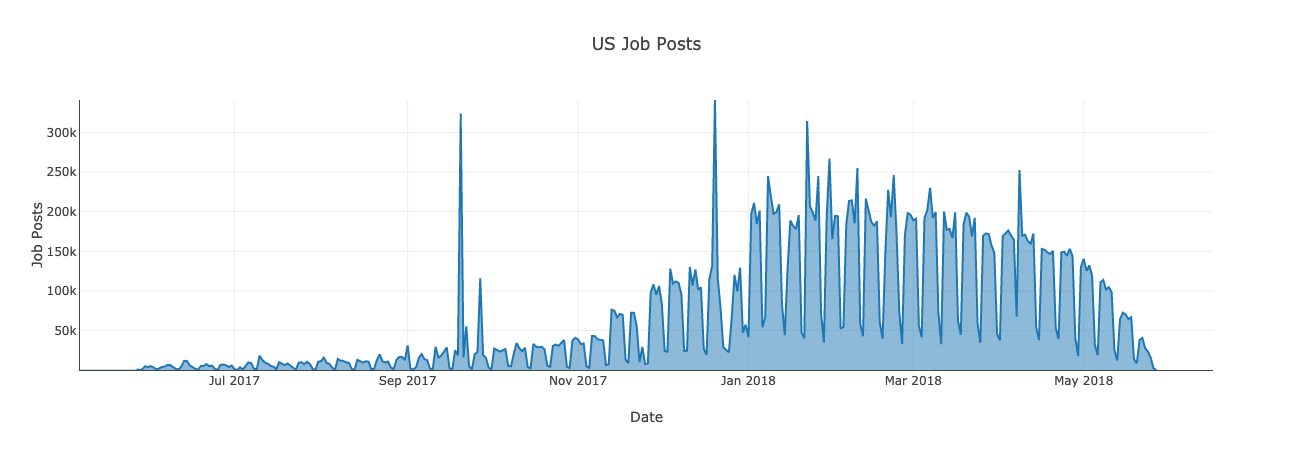

In [108]:
trace = go.Scatter(x=per_day['posted_date'], y=per_day['posts'], fill='tozerox')

layout = go.Layout(title='US Job Posts',
                   xaxis=dict(autorange=True, showgrid=True, zeroline=False, showline=True, showticklabels=True, title='Date'),
                   yaxis=dict(autorange=True, showgrid=True, zeroline=True, showline=True, showticklabels=True, title='Job Posts'))

data = [trace]

fig = go.Figure(data=data, layout=layout)

py.plot(fig, filename='plots/total_posts_over_time.html', auto_open=False)
py.iplot(fig)

## By state

In [79]:
by_state = jobs_city_date.groupby(['region', 'posted_date']).sum()
by_state.reset_index(level='posted_date', inplace=True)
states = by_state.index.unique()

pop = pd.read_feather('other_data/census.feather')
pop.set_index('region', inplace=True)

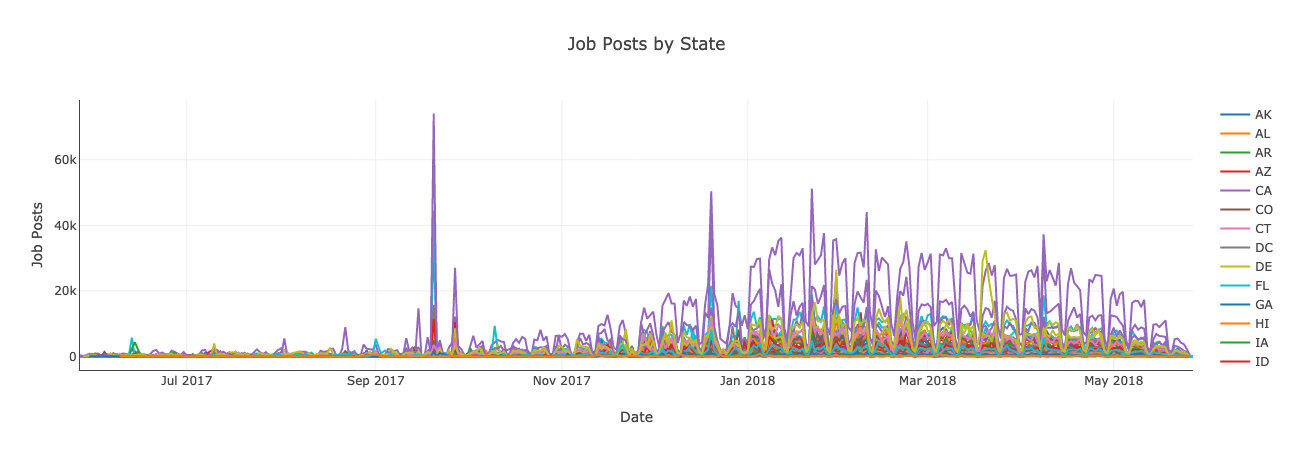

In [109]:
layout = go.Layout(title='Job Posts by State',
                   xaxis=dict(autorange=True, showgrid=True, zeroline=False, showline=True, showticklabels=True, title='Date'),
                   yaxis=dict(autorange=True, showgrid=True, zeroline=True, showline=True, showticklabels=True, title='Job Posts'))

data = [go.Scatter(x=by_state.loc[state]['posted_date'], y=by_state.loc[state]['posts'], name=state) for state in states]

fig = go.Figure(data=data, layout=layout)

py.plot(fig, filename='plots/state_posts_over_time.html', auto_open=False)
py.iplot(fig)

## Weekly distribution

In [51]:
week = pd.read_feather('grouped/weekly_distribution.feather')

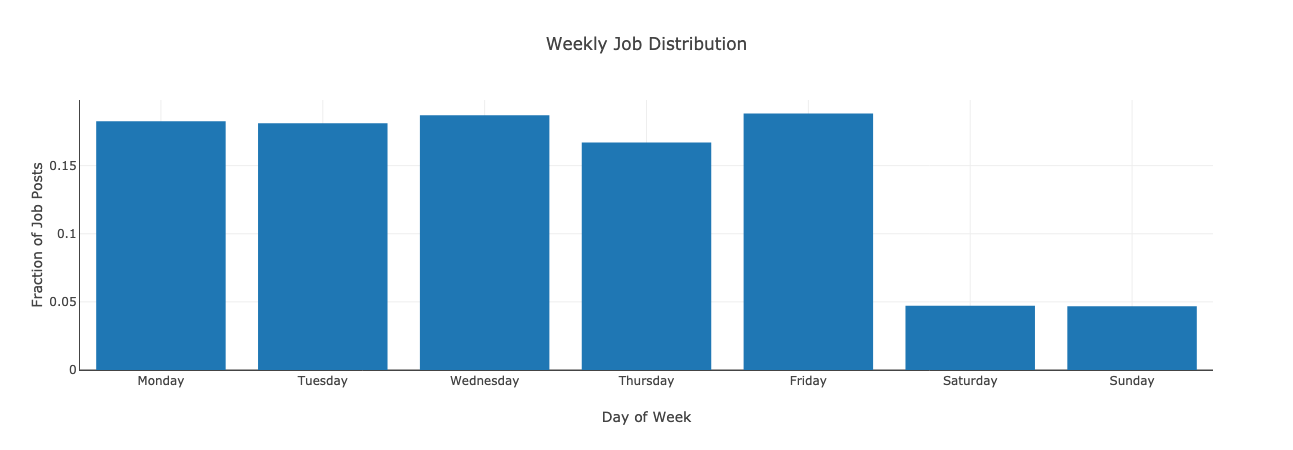

In [110]:
trace = go.Bar(x=week['day_of_week'], y=week['ratio'])

data = [trace]

layout = go.Layout(title='Weekly Job Distribution',
                   xaxis=dict(autorange=True, showgrid=True, zeroline=False, showline=True, showticklabels=True, title='Day of Week'),
                   yaxis=dict(autorange=True, showgrid=True, zeroline=True, showline=True, showticklabels=True, title='Fraction of Job Posts'))

fig = go.Figure(data=data, layout=layout)

py.plot(fig, filename='plots/weekly_distribution.html', auto_open=False)
py.iplot(fig)

## Jobs by location

In [81]:
tot_state = by_state.groupby('region')
tot_state = tot_state.sum()['posts'].to_frame()
tot_state['per_capita'] = tot_state['posts'].div(pop['population'])

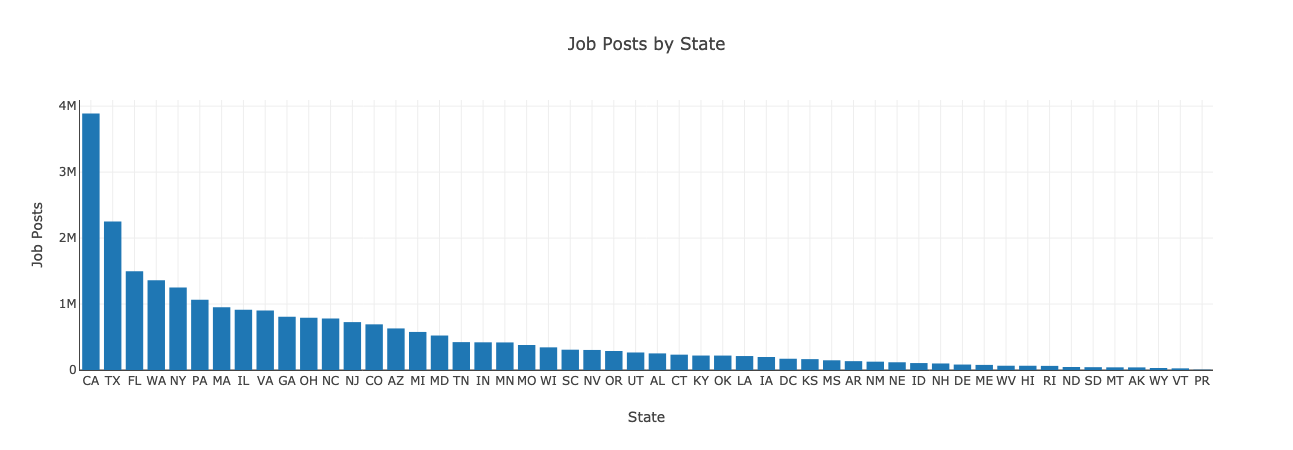

In [114]:
tot_state.sort_values('posts', ascending=False, inplace=True)

layout = go.Layout(title='Job Posts by State',
                   xaxis=dict(autorange=True, showgrid=True, zeroline=False, showline=True, showticklabels=True, title='State'),
                   yaxis=dict(autorange=True, showgrid=True, zeroline=True, showline=True, showticklabels=True, title='Job Posts'))

data = [go.Bar(x=tot_state.index, y=tot_state['posts'])]

fig = go.Figure(data=data, layout=layout)

py.plot(fig, filename='plots/posts_by_state.html', auto_open=False)
py.iplot(fig)

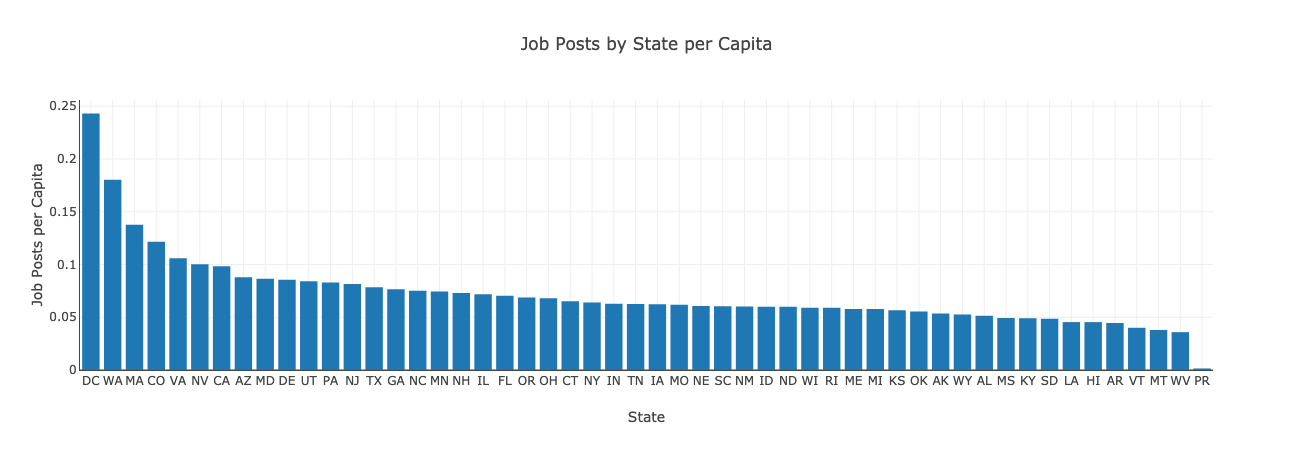

In [112]:
tot_state.sort_values('per_capita', ascending=False, inplace=True)

layout = go.Layout(title='Job Posts by State per Capita',
                   xaxis=dict(autorange=True, showgrid=True, zeroline=False, showline=True, showticklabels=True, title='State'),
                   yaxis=dict(autorange=True, showgrid=True, zeroline=True, showline=True, showticklabels=True, title='Job Posts per Capita'))

data = [go.Bar(x=tot_state.index, y=tot_state['per_capita'])]

fig = go.Figure(data=data, layout=layout)

py.plot(fig, filename='plots/posts_per_capita.html', auto_open=False)
py.iplot(fig)